# 클러스터링 결과 시각화하기
## PCA

### 1. 3229 데이터

In [19]:
import pandas as pd
import numpy as np
from sklearn import cluster 
from sklearn import preprocessing

In [20]:
def delete_s(sen):
    sen = sen.replace(" ","")
    return sen

def delete(genre_sentence):
    try:
        genre_sentence = genre_sentence.replace("'","")
        genre_sentence = genre_sentence[genre_sentence.index("[")+1:genre_sentence.index("]")]
        genre_sentence = list(map(delete_s, genre_sentence.split(",")))
        return genre_sentence
    except:
        return None
    
def get_encoding(genre, encoding, genre_dic):
    g_encoding = np.zeros(len(genre_dic))
    for g in genre:
        g_encoding += encoding[genre_dic[g]]
    return g_encoding

In [22]:
data_3229 = pd.read_csv("/opt/ml/input/data/3229_plus_side_info_plus_korean_genre_and_plot.csv")

# 데이터프레임 제작 과정
data = data_3229[['Contents', 'movieId', 'genres']]
data = data.drop_duplicates(subset=['movieId'])
data['movieId'] = data['movieId'].apply(lambda x : int(x))

# 장르 클러스터링 컬럼 생성
data['genres_list'] = data['genres'].apply(lambda x:delete(x))
data.dropna(axis=0, inplace=True)

genre = []
for genres in list(data['genres_list']):
    genre.extend(genres)
genre = list(set(genre))

values = []
for x in range(len(genre)):
    values.append(x)

encoding = np.eye(len(values))[values]

genre_dic = dict()
for idx, g in enumerate(genre):
    genre_dic[g] = idx

data['genre_encode'] = data['genres_list'].apply(lambda x: get_encoding(x, encoding, genre_dic))

encode_df = pd.merge(data['movieId'], pd.DataFrame(list(data['genre_encode']), index=data['movieId']), on='movieId',how='inner')

In [23]:
X = encode_df.iloc[:,1:]
X = preprocessing.StandardScaler().fit_transform(X)

In [24]:
kmeans = cluster.KMeans(n_clusters=3, random_state=2023)
kmeans.fit(X)

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2023)

In [25]:
cluster_label = kmeans.labels_ 
encode_df['cluster'] = cluster_label

In [26]:
encode_df

,movieId,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,cluster
0,73141,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,122470,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
2,152081,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
3,4447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,1246,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,31427,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2985,150254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2986,122916,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2987,177115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [27]:
x = encode_df.iloc[:,1:-1].values
x

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Z = StandardScaler().fit_transform(x)

In [29]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(Z)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [30]:
principalDf.head()

,principal component1,principal component2
0,5.973257,-0.116586
1,4.285211,-0.258026
2,3.024689,1.500839
3,0.257611,-1.213311
4,-0.306137,-0.971166


In [31]:
principalDf.shape

(2989, 2)

In [32]:
final_df = pd.concat([encode_df, principalDf], axis=1)

In [33]:
sum(pca.explained_variance_ratio_)

0.193672392534292

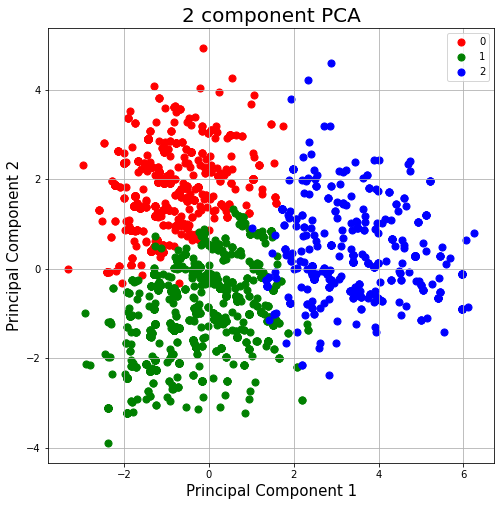

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['cluster'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component1']
               , final_df.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### 2. 4035 데이터

In [35]:
data_4035 = pd.read_csv("/opt/ml/input/data/content_based_4035.csv")
data = data_4035[['Contents', 'movieId', 'genres', 'popular', 'year']]

In [36]:
def cleaning(pop):
    if "만" in pop:
        return int(pop.replace("만","0000"))
    if "," in pop:
        return int(pop.replace(",", ""))
    return int(pop)

def delete2(genre_sentence):
    try:
        genre_sentence = genre_sentence.replace("'","")
        genre_sentence = list(map(delete_s, genre_sentence.split(",")))
        return genre_sentence
    except:
        return None
    
def get_encoding(genre, encoding, genre_dic):
    g_encoding = np.zeros(len(genre_dic))
    for g in genre:
        g_encoding += encoding[genre_dic[g]]
    return g_encoding

In [37]:
# "no_data" 결측치 처리 과정
data[data['popular'] != "no_data"][data['year'] == "no_data"]
data.loc[data['movieId'] == 156002, 'year'] = 2015
data = data[data['popular'] != "no_data"]
data = data[data['year'] != "no_data"]
data.dropna(axis=0, inplace=True)
data['year'] = data.loc[:, 'year'].apply(lambda x: int(x))

# popular 컬럼 처리 과정
data['popular'] = data.loc[:,'popular'].apply(lambda x: cleaning(x))

# 장르 클러스터링 컬럼 생성
data['genres_list'] = data['genres'].apply(lambda x:delete2(x))
    
genre = []
for genres in list(data['genres_list']):
    genre.extend(genres)
genre = list(set(genre))

values = []
for x in range(len(genre)):
    values.append(x)

genre_dic = dict()
for idx, g in enumerate(genre):
    genre_dic[g] = idx

encoding = np.eye(len(values))[values]

data['genre_encode'] = data['genres_list'].apply(lambda x: get_encoding(x, encoding, genre_dic))
encode_df = pd.merge(data['movieId'], pd.DataFrame(list(data['genre_encode']), index=data['movieId']), on='movieId',how='inner')

/tmp/ipykernel_115864/386850439.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['popular'] != "no_data"][data['year'] == "no_data"]


In [38]:
X = encode_df.iloc[:,1:]
X = preprocessing.StandardScaler().fit_transform(X)

In [39]:
kmeans = cluster.KMeans(n_clusters=3, random_state=2023)
kmeans.fit(X)

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2023)

In [40]:
cluster_label = kmeans.labels_ 
encode_df['cluster'] = cluster_label

In [41]:
encode_df

,movieId,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,cluster
0,73141,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,122470,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,152081,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,4447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1246,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,301014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3643,301015,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3644,301017,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3645,301018,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [42]:
x = encode_df.iloc[:,1:-1].values
x

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Z = StandardScaler().fit_transform(x)

In [44]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(Z)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [45]:
principalDf.head()

,principal component1,principal component2
0,5.784560,-0.398328
1,4.163140,-0.389263
2,2.935090,1.335869
3,0.182205,-1.331656
4,-0.358635,-1.030354


In [46]:
principalDf.shape

(3647, 2)

In [47]:
final_df = pd.concat([encode_df, principalDf], axis=1)

In [48]:
sum(pca.explained_variance_ratio_)

0.19520511661435797

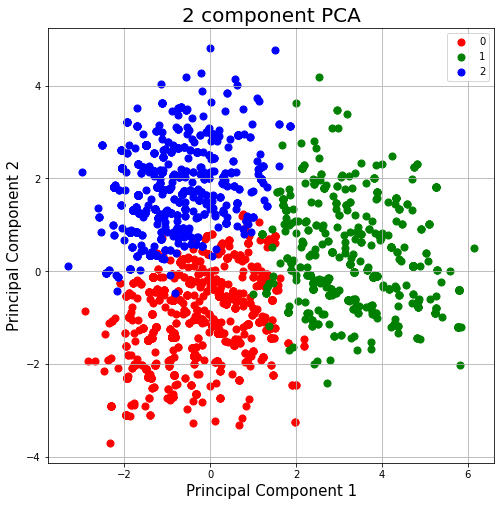

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['cluster'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component1']
               , final_df.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()